![Save2Drive](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/save2drive.png)

# Outline

### Introduction
0. Brief introductory reading

### Implement Simple Model
1. Implementation: Preprocessing
2. Implementation: Training the simple model
3. Brief reading about evaluation
4. Implementation: Making predictions
5. Evaluating the simple model
6. Analysis

### Implement Bigram Model
6. Implementation: Preprocessing
7. Implementation: Training the bigram model
8. Implementation: Making predictions
9. Evaluating the bigram model

# 0. Introductory Reading (3 minutes)

![Language Identification](https://raw.githubusercontent.com/alahnala/AI4All2020-Michigan-NLP/master/slides/lang-ident-1.png)

![Intuition](LanguageDetectionSlides/Slide2.png)

## Your project

In this project, you will build a system that predicts the language of a string of text. There are many methods for doing this, but you will be implementing the simplest method, that is often the most or highly effective.




**Setup**

In [1]:
# Setup - run
from utils.lang_detect_helpers import *
from tqdm import tqdm
from collections import Counter

# 1. Preprocessing

## 1.1 Write a preprocess function. Refer to the 1-intro notebook for ideas!

In [2]:
def preprocess(text):
    '''
    (Template) Implement preprocessing for language detection. Input is a string, and output should be a list of strings.
    '''
    preprocessed_text = text
    return preprocessed_text # should be a list of strings

In [3]:
test = 'Hello!! Making a system that can tell me the language of a string of text will unlock many possibilities! :D'
preprocess(test)

'Hello!! Making a system that can tell me the language of a string of text will unlock many possibilities! :D'

## 1.2. Run the cells to preprocess each language's text

In [4]:
# Preprocess your english text
preprocessed_english_text = preprocess(english_text)

# Preprocess your german text
preprocessed_german_text = preprocess(german_text)

# Preprocess your dutch text
preprocessed_dutch_text = preprocess(dutch_text)

# 2. Train the model

## 2.1 Implement the "train" function for our simplified model we introduced

-For this training step, we simply need to count each unit (as you've preprocessed) of the string

In [5]:
def train(strings):
    '''
    (Solution) Implement the train function for our simplified method.
    
    Input: A list of preprocessed strings.
    Output: A dictionary of counts of each string.
    '''
    unigram = defaultdict(lambda:0)
            
    for item in strings:
        unigram[item] += 1

    return unigram

## 2.1 Run the "train" function on the text of each language.

In [6]:
unigram_dicts['English'] = train(preprocessed_english_text)
unigram_dicts['German'] = train(preprocessed_german_text)
unigram_dicts['Dutch'] = train(preprocessed_dutch_text)

# 3. (Read) Evaluating model at test time

Spend a few minutes reading and running the code for 3.1 - 3.3.

### 3.1. `test_strings`
At test time, we will take a list of strings called `test_strings` and use our model to predict the language of the strings.

In [7]:
# Run to observe the first 4 test strings.

for i, string in enumerate(test_strings[:4]):
    print(i, string)

0 Description   Historians write in the context of their own time, and with due regard to the current dominant ideas of how to interpret the past, and sometimes write to provide lessons for their own society.
1 Diese nachträgliche Geschichtserkenntnis gründet sich auf Überreste und Tradition.
2 tot 800 v.Chr.
3 Geschichtsschreibung und Geschichte der Geschichtsschreibung).


### 3.2. `ground_truth`
To see how good our model is, we have a list called `ground_truth` which as the true language of each string, which we are hoping to predict with our model. We use **accuracy** (number correct divided by total number) as the metric to measure how well the model does.

In [8]:
# Run to observe the first ground truth languages for the 4 test strings.

for i, language in enumerate(ground_truth[:4]):
    print(i, language)

0 English
1 German
2 Dutch
3 German


### 3.3. Random baseline
* Language detection is a **classification task.** In order to believe that a model is actually learns anything, we would want to see significant performance over a **random baseline,** which is a "model" in a sense. This "model" is one that "guesses" the language of each sample randomly.  

* In this project, we have three languages: English, German, and Dutch. Our test set has an even split over the 3 languages, so we should expect our **random baseline** model to perform at about 33.33% accuracy. 

In [9]:
language_count = Counter(ground_truth)

print('Language','|', '# Test Items')
for language, count in language_count.items():
    print(language,'|', count)
print('-' * 15, '\n', 'Total','|', sum(language_count.values()))
print("\nAccuracy of randomly guessing: about {:.2%}".format(Counter(ground_truth)['English']/198))

Language | # Test Items
English | 66
German | 66
Dutch | 66
--------------- 
 Total | 198

Accuracy of randomly guessing: about 33.33%


# 4. Test time

## 4.1 write the function `identify_language`

In [10]:
def identify_language(test_string, languages, unigram_dicts):
    '''
    (Solution) Fill in this function to predict the language of test_string
    
    input: test_string, list of our languages, unigram_dicts
    output: one of the languages
    '''
    
    probabilities = {'English': 1, 'German': 1, 'Dutch': 1}
    
    for lang in languages:
        for i in range(len(test_string)):
            
            unigram = test_string[i]
            
            top = unigram_dicts[lang][unigram]
            bottom = len(unigram_dicts[lang])


            probability_i = (top / bottom)
            probabilities[lang] = probabilities[lang] * probability_i
    
    highest_probability_language = get_highest_probability_language(probabilities)
    return highest_probability_language

## 4.2 Run the cell below to call `identify_language` on each test string, saving the predictions in the list `predictions`

In [11]:
# Run to call your identify_language function on each test string to make the language predictions

predictions = []
for line in test_strings:
    preprocessed_line = preprocess(line)
    prediction = identify_language(preprocessed_line, languages, unigram_dicts)
    predictions.append(prediction)

print("First 10 predictions:\n", predictions[:10])

First 10 predictions:
 ['English', 'German', 'German', 'German', 'German', 'English', 'German', 'German', 'English', 'German']


# 5. Evaluate your model

## 5.1. Run the cell to call the function `evaluate,` which will compute the accuracy of your model's predictions.

In [12]:
accuracy, data = evaluate(predictions, ground_truth, test_strings)
print(accuracy)

Accuracy: 62.12%. 123 out of 198 predictions were correct.


## 5.2. The evaluate function also created a data structure called `data`. For each ground truth language, `data` keeps track of which language each string was predicted as. Run the cell below to conceptualize what `data` looks like.**

In [13]:
show_data_structure(data)

English example predicted to be English:
 ---------------------------------------- 
 Description   Historians write in the context of their own time, and with due regard to the current dominant ideas of how to interpret the past, and sometimes write to provide lessons for their own society.


English example predicted to be German:
 ---------------------------------------- 
 But writing is the marker that separates history from what comes before.


English example predicted to be Dutch:
 ---------------------------------------- 
 History was borrowed from Latin (possibly via Old Irish or Old Welsh) into Old English as stær ('history, narrative, story'), but this word fell out of use in the late Old English period.


## 5.3. Using `data`, we can create a visual to help us perform error analysis. Run the cell below to call the function `actual_vs_predicted`. It will output a figure that will show us the number of English samples correctly classified as English, incorrectly classified as German and Dutch, and the same for the other languages. If our model is perfect, we would see a diagonal of cells with `66`. The function `actual_vs_predicted_text(data)` will output descriptive text for the matrix to help you interpret this matrix.**

<Figure size 432x288 with 0 Axes>

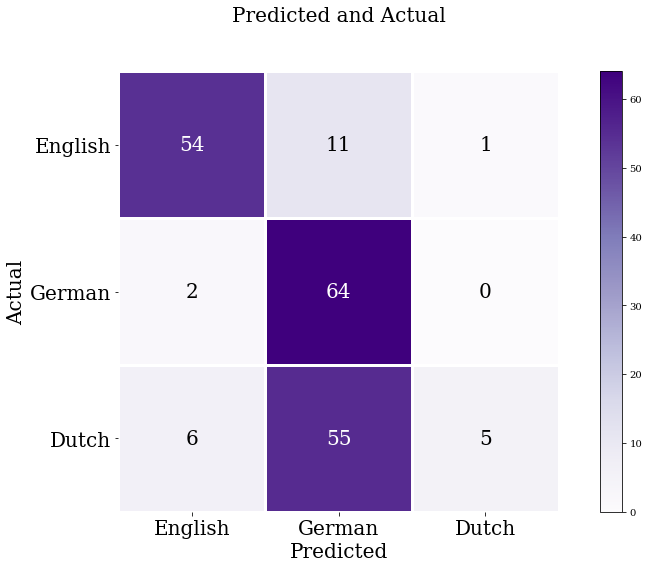

54 English sentences were predicted to be English
1 English sentences were predicted to be Dutch
11 English sentences were predicted to be German


64 German sentences were predicted to be German
0 German sentences were predicted to be Dutch
2 German sentences were predicted to be English


5 Dutch sentences were predicted to be Dutch
55 Dutch sentences were predicted to be German
6 Dutch sentences were predicted to be English


In [14]:
actual_vs_predicted(languages, data)
actual_vs_predicted_text(data)

# 6. Analysis

Did your model operate perfectly? Likely, there are at least a few errors. Use the space below to study the predictions made by your model. Try to answer the following questions with your analysis:

### 1. Are there clear differences between the strings that the model predicted **English** correctly, and the strings the model incorrectly predicted to be **German** for English strings instead?
### 2. Are there clear differences between the strings that the model predicted **English** correctly, and the strings the model incorrectly predicted to be **Dutch** for English strings instead?
### 3. Are there clear differences between the strings that the model predicted **German** correctly, and the strings the model incorrectly predicted to be **English** for German strings instead?
### 4. Are there clear differences between the strings that the model predicted **German** correctly, and the strings the model incorrectly predicted to be **Dutch** for German strings instead?
### 5. Are there clear differences between the strings that the model predicted **Dutch** correctly, and the strings the model incorrectly predicted to be **English** for Dutch strings instead?
### 6. Are there clear differences between the strings that the model predicted **Dutch** correctly, and the strings the model incorrectly predicted to be **German** for Dutch strings instead?
### 7. If you were to modify your preprocessing steps, what do you think you could do to improve the model?
### 8. Can you think of another possible model for language detection that might work better?
